In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import os
from pprint import pprint
import tensorflow as tf
import pandas as pd

os.chdir('../')
from utils.custom_utils import read_from_pickle, save_to_pickle, create_nn
from utils.nn_utils import read_params_dict, load_trained_weights
from utils.plot_utils import print_output_log, plot_pearson_corr

In [2]:
# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 15

### Read pickle files 

In [58]:
# Single AE for f5-f13 functions
save_dir = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/Rockfish_runs/Rockfish_trial_100pts_l1_1em1_l2_1em1_batchsize_10_5-2_latent_split_inverted/vanilla_ae_1'
path = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/datasets/synthetic_dataset/synthetic_data_1000pts.csv'
df = pd.read_csv(path).to_numpy()
#inputs = read_from_pickle('nn_X.pkl', save_dir)
latents = read_from_pickle('nn_latents.pkl', save_dir)
inputs2=df[:,4:12]
inputs3=df[:,0:12]

# Single AE for all functions
save_dir2 = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/Rockfish_runs/Rockfish_trial_100pts_singleAE_l1_1em1_l2_1em1_batchsize_10/vanilla_ae_1'
latents2 = read_from_pickle('nn_latents.pkl', save_dir2)

save_dir3 = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/Rockfish_runs/Rockfish_trial_100pts_l1_1em1_l2_1em1_batchsize_10/vanilla_ae_2'
save_dir4 = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/Seq-AE/runs/Rockfish_runs/Rockfish_trial_100pts_l1_1em1_l2_1em1_batchsize_10/vanilla_ae_1'
latents3 = read_from_pickle('nn_latents.pkl', save_dir3)
latents3_ae1 = read_from_pickle('nn_latents.pkl', save_dir4)

df1 = pd.read_csv(path)
df1['latents1'] = latents3_ae1[:,0]
df1['latents2'] = latents3_ae1[:,1]

df_withlatents=df1.to_numpy()
inputs1 = df_withlatents[:,4:15]

# pca_2D = read_from_pickle('PCA_2D_data.pkl', save_dir+'/plots/pca_2D')
# print(inputs)
#print(np.unique(file3[1]))
#print(inputs)
#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(file3)



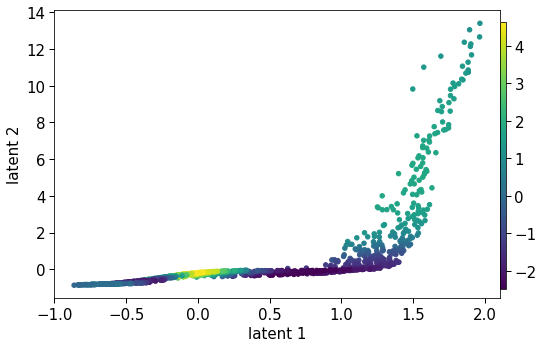

In [28]:
c = np.linalg.norm(inputs, axis=1)
c = inputs3[:,1]

fig, ax = plt.subplots(figsize=(8,5.3))
latents_2D_data = ax.scatter(latents[:,0], latents[:,1], marker='.', c=c, s=80)
ax.set_xlabel('latent 1',size=15)
ax.set_ylabel('latent 2',size=15)

cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    
if cax:
    fig.colorbar(latents_2D_data, cax=cax, orientation='vertical')
    

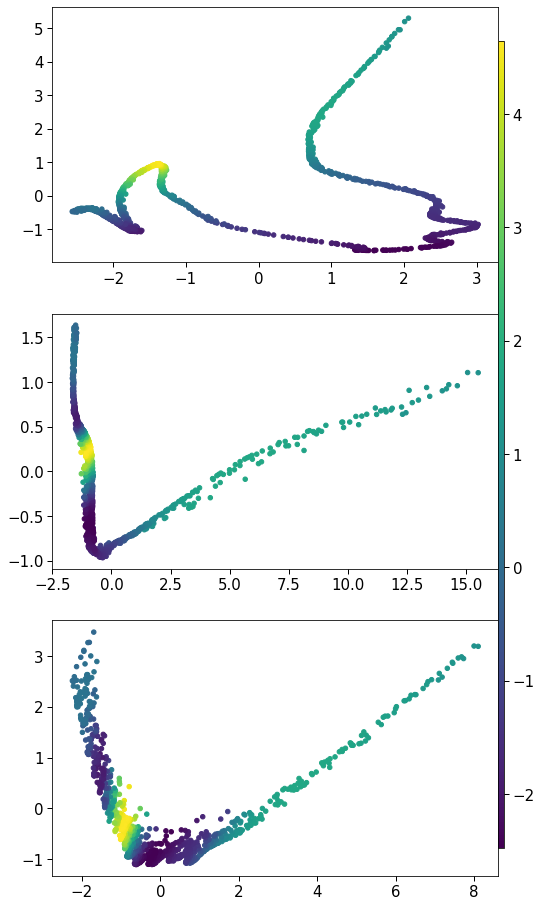

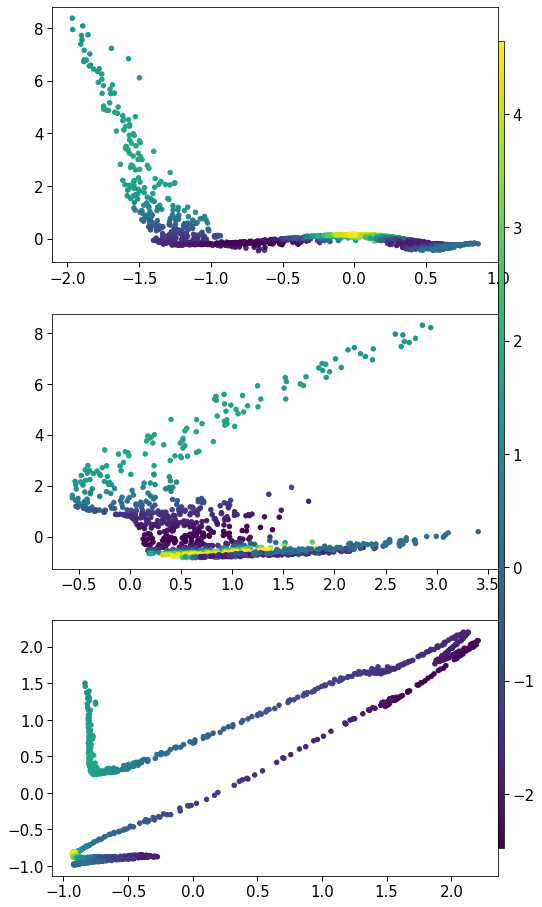

In [65]:
pca_2D = PCA(n_components=5)
latents1_pca = pca_2D.fit_transform(latents)
latents2_pca = pca_2D.fit_transform(latents2)
latents3_pca = pca_2D.fit_transform(latents3)

c = np.linalg.norm(inputs, axis=1)
c = inputs3[:,1]

fig, ax3 = plt.subplots(3,figsize=(8,16))
ax3[0].scatter(latents3_pca[:,0], latents3_pca[:,1], marker='.', c=c, s=80)
ax3[1].scatter(latents1_pca[:,0], latents1_pca[:,1], marker='.', c=c, s=80)
ax3[2].scatter(latents2_pca[:,0], latents2_pca[:,1], marker='.', c=c, s=80)

# ax.set_xlabel('latent 1',size=15)
# ax.set_ylabel('latent 2',size=15)

cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    
if cax:
    fig.colorbar(latents_2D_data, cax=cax, orientation='vertical')
    
fig, ax2 = plt.subplots(3,figsize=(8,16))
ax2[0].scatter(-latents[:,0], latents[:,2], marker='.', c=c, s=80)
ax2[1].scatter(latents2[:,0], latents2[:,1], marker='.', c=c, s=80)
ax2[2].scatter(latents3[:,0], latents3[:,1], marker='.', c=c, s=80)

# ax.set_xlabel('latent 1',size=15)
# ax.set_ylabel('latent 2',size=15)

cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    
if cax:
    fig.colorbar(latents_2D_data, cax=cax, orientation='vertical')

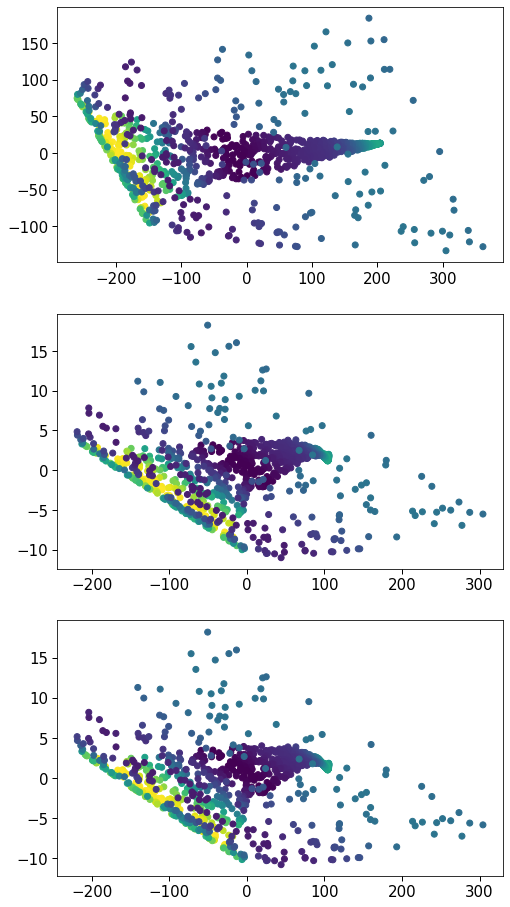

In [8]:
# z1 = np.linspace(0.01, 10, 199)
# z2 = np.linspace(2, 10, 199)

# print(z1.shape)

# fig2, ax2 = plt.subplots(figsize=(8,8))
# ax2.scatter(z1, c)

c = inputs3[:,1]

pca_2D = PCA(n_components=5)
inputs_transformed_to_2D_1 = pca_2D.fit_transform(inputs1)
inputs_transformed_to_2D_2 = pca_2D.fit_transform(inputs2)
inputs_transformed_to_2D_3 = pca_2D.fit_transform(inputs3)

fig3, ax3 = plt.subplots(3, figsize=(8,16))
ax3[0].scatter(inputs_transformed_to_2D_1[:,1], inputs_transformed_to_2D_1[:,2],  c=c)
ax3[1].scatter(inputs_transformed_to_2D_2[:,1], inputs_transformed_to_2D_2[:,2],  c=c)
ax3[2].scatter(inputs_transformed_to_2D_3[:,1], inputs_transformed_to_2D_3[:,2],  c=c)
# ax3[0].set_xlabel('PCA 2',size=15)
# ax3[0].set_ylabel('PCA 1',size=15)
# ax3[1].scatter(latents[:,0], latents[:,1], c=c)
# ax3[1].set_xlabel('Latent 1',size=15)
# ax3[1].set_ylabel('Latent 2',size=15)
# ax3[2].scatter(inputs[:,0], inputs[:,2], c=c)

#print(latents_2D_data.shape)

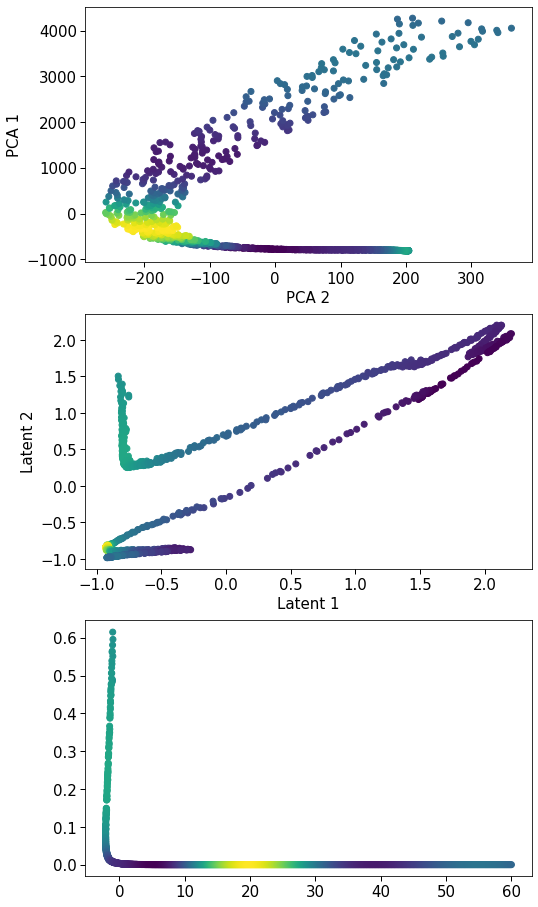

In [61]:
pca_2D = PCA(n_components=5)
inputs_transformed_to_2D = pca_2D.fit_transform(inputs1)
c = inputs3[:,1]

fig3, ax3 = plt.subplots(3, figsize=(8,16))
ax3[0].scatter(inputs_transformed_to_2D[:,1], inputs_transformed_to_2D[:,0],  c=c)
ax3[0].set_xlabel('PCA 2',size=15)
ax3[0].set_ylabel('PCA 1',size=15)
ax3[1].scatter(latents3[:,0], latents3[:,1], c=c)
ax3[1].set_xlabel('Latent 1',size=15)
ax3[1].set_ylabel('Latent 2',size=15)
ax3[2].scatter(inputs[:,0], inputs[:,2], c=c)

#print(latents_2D_data.shape)

# save_dir = '../runs/CD_10_nodes_layer_and_sample_dropout_nested_orig/vanilla_ae_1/X_preprocessors'
save_dir = '../runs/CD_vanillaNN_test0/vanilla_ae_1/X_preprocessors'
file = read_from_pickle('X_encoder_list.pkl', save_dir)
print(file)
print(len(file))
#print(file[0].scale_)
#print(file[0].mean_)
#print(file[0].var_)
print(file[1].categories_[0])
#print(file[2].inverse_transform(np.array([0,0,0,0,1,0]).reshape(1, -1)))

### Plot PCA 3D space

In [ ]:
# Select the model directory
run_dir = '../runs/CD_nestedAE_hidden10_latent3_l2_0_1'
nn_index = 1

params_dict_list = read_params_dict(run_dir, nn_index)

nn_save_dir = params_dict_list[0]
nn_params_dict = params_dict_list[1]
nn_dataset_dict = params_dict_list[4]

latents = read_from_pickle('nn_latents.pkl', nn_save_dir)

plots_dir = nn_save_dir + '/plots'
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

figure_dir = plots_dir + '/pca_3D'
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

# Plot for 3D PCA is only available to view through jupyter notebook
pca_3D = PCA(n_components=3)
latents_transformed_to_3D = pca_3D.fit_transform(latents)

save_to_pickle(latents_transformed_to_3D, 'PCA_3D_data.pkl', figure_dir)
print(' --> Transformed points to 3D')
print(' --> PCA 3D Stats : \n')
# Principle axes in feature space representing direction of max variance
print(f' --> Components : {pca_3D.components_} \n')
print(f' --> Explained variance : {pca_3D.explained_variance_} \n')
print(f' --> Explained variance ratio : {pca_3D.explained_variance_ratio_} \n')
print(f' --> Per feature empirical mean : {pca_3D.mean_} \n')

if 'y_layers' in nn_params_dict.keys():
    # We only use the first label to color code points in the latent
    y = np.squeeze(read_from_pickle('nn_y_pred.pkl', nn_save_dir)[0].numpy())

    # Check if any preprocessing done on the labels
    if nn_dataset_dict['y_preprocess_scheme']:
        y_preprocessors = params_dict_list[8]
        y_encoder_list = y_preprocessors[0]
        y_scaler_list = y_preprocessors[1]

        y_descr = params_dict_list[7]
        y_dtype_list = y_descr[0] 
        y_dim_list = y_descr[1]

        if y_dtype_list[0] == 'cat':
            c = np.squeeze(y_encoder_list[0].inverse_transform(y.reshape(-1,1)))
        else:
            c = np.squeeze(y_scaler_list[0].inverse_transform(y.reshape(-1,1)))
    else:
        c = y
        
    cmin = np.min(c)
    cmax = np.max(c)
    colorscale = 'viridis'
else:
    c = 'k'
    cmin = None
    cmax = None
    colorscale = None

fig_pca_3d = go.Figure(data=[go.Scatter3d(x=latents_transformed_to_3D[:,0],
                                          y=latents_transformed_to_3D[:,1],
                                          z=latents_transformed_to_3D[:,2],
                                          mode='markers',
                                          marker=dict(size=4,
                                                      color=c,
                                                      colorscale=None,
                                                      cmin=cmin,
                                                      cmax=cmax,
                                                      showscale=True,
                                                      opacity=1))])
    
fig_pca_3d.show()

In [ ]:
# Test to check is latents are decorrelated

import pandas as pd
import seaborn as sns

data = pd.DataFrame(latents_transformed_to_3D)
sns.heatmap(data.corr(), annot=True, cmap='bwr')

In [ ]:
# Calculating spearman correlation coefficient
from scipy.stats import spearmanr

rho, pvalue = spearmanr(latents_transformed_to_3D)
sns.heatmap(pvalue, annot=True, cmap='bwr')

In [ ]:
# Calculating mutual information
# Import the necessary libraries
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy, pearsonr


# Calculate the mutual information using sklearn
mi_sklearn = mutual_info_score(latents_transformed_to_3D[:,0], latents_transformed_to_3D[:,2])

print(mi_sklearn)
print(entropy(latents_transformed_to_3D[:,1]))

In [ ]:
import dcor

hgmcorr = dcor.distance_correlation(latents_transformed_to_3D[:,0], latents_transformed_to_3D[:,1])

print(hgmcorr)

### Plot 3D latent space

In [ ]:
# Select the model directory
run_dir = '../runs/CD_nestedAE_hidden10_latent3_l2_0_1'
nn_index = 1

params_dict_list = read_params_dict(run_dir, nn_index)

nn_save_dir = params_dict_list[0]
nn_params_dict = params_dict_list[1]
nn_dataset_dict = params_dict_list[4]

''' Test Case
x = np.arange(0, 100, 1)
y = np.sin(x)
#z = np.cos(x)
#w = np.tan(x)
latents = np.transpose(np.vstack((x,y)))
'''

latents = read_from_pickle('nn_latents.pkl', nn_save_dir)

assert latents.shape[1] == 3, f'Latent space dimension {latents.shape[1]} not equal to 3. Use 3D/2D PCA to visualize'

plots_dir = nn_save_dir + '/plots'
if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

figure_dir = plots_dir + '/latents_3D'
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

if 'y_layers' in nn_params_dict.keys():
    # We only use the first label to color code points in the latent
    y = np.squeeze(read_from_pickle('nn_y_pred.pkl', nn_save_dir)[0].numpy())

    # Check if any preprocessing done on the labels
    if nn_dataset_dict['y_preprocess_scheme']:
        y_preprocessors = params_dict_list[8]
        y_encoder_list = y_preprocessors[0]
        y_scaler_list = y_preprocessors[1]

        y_descr = params_dict_list[7]
        y_dtype_list = y_descr[0] 
        y_dim_list = y_descr[1]

        if y_dtype_list[0] == 'cat':
            c = np.squeeze(y_encoder_list[0].inverse_transform(y.reshape(-1,1)))
        else:
            c = np.squeeze(y_scaler_list[0].inverse_transform(y.reshape(-1,1)))
    else:
        c = y
        
    cmin = np.min(c)
    cmax = np.max(c)
    colorscale = 'viridis'
else:
    c = 'black'
    cmin = None
    cmax = None
    colorscale = None
    
fig_pca_3d = go.Figure(data=[go.Scatter3d(x=latents[:,0],
                                          y=latents[:,1],
                                          z=latents[:,2],
                                          mode='markers',
                                          marker=dict(size=4,
                                                      color=c,
                                                      colorscale=colorscale,
                                                      cmin=cmin,
                                                      cmax=cmax,
                                                      showscale=True,
                                                      opacity=1))])
    
fig_pca_3d.show()

### Sample from 3D latent/PCA space

In [ ]:
# Select a point from either 3D latent space or 3D PCA space
x = 2.84
y = 0.99
z = -0.53
sampled_latent_point = np.array([[x, y, z]])
run_dir = '../../runs/carbondots_single_ae_nodes_10_no_latent_dropout'
nn_index = 0
global_seed = 4004
strategy = '3D' # Other strategies would be '3D', 'slerp'... 

In [ ]:
# Load the params dictionary
params_dict_list = read_params_dict(run_dir, nn_index) 
nn = create_nn(params_dict_list[0], global_seed, params_dict_list[1], params_dict_list[2], 
               params_dict_list[3], params_dict_list[5], params_dict_list[7])

checkpoint = tf.train.Checkpoint(nn)
print(tf.train.latest_checkpoint(nn_save_dir + '/checkpoints'))
checkpoint.restore(tf.train.latest_checkpoint(nn_save_dir + '/checkpoints')).expect_partial()

assert strategy == 'PCA_3D' or strategy == '3D', 'Sampling strategy not supported'

if strategy == 'PCA_3D':
    assert sampled_latent_point.shape[1] == 3, f'Sampled latent point has dimensions greater than 3'
    latent = pca_3D.inverse_transform(sampled_latent_point).reshape(1, 10)
    print(f' --> Latent Coordinate : {latent}')
    
if strategy == '3D':
    print(f' --> Latent Coordinate : {sampled_latent_point}')
    
if strategy == 'slerp':
    pass

nn_params_dict = params_dict_list[1]

if nn_params_dict['add_supervision_on_latent']:
    y_pred = nn.y_pred_net(sampled_latent_point)
X_hat = nn.decoder(sampled_latent_point)

X_descr = params_dict_list[5]
X_preprocessors = params_dict_list[6]
y_descr = params_dict_list[7]
y_preprocessors = params_dict_list[8]

# Decode each back into original output 
X_dtype_list = X_descr[0]
y_dtype_list = y_descr[0]

transformed_reconstructions = []
transformed_predictions = []
num_count = 0
cat_count = 0

print(X_dtype_list)

for i, X_dtype in enumerate(X_dtype_list):
    if X_dtype == 'num':
        reconsts = X_hat[i][0].numpy()
        for reconst in reconsts:
            transformed_reconstructions.append(X_preprocessors[1][num_count].inverse_transform(reconst.reshape(1,-1)))
            num_count += 1
        
        print(num_count)
    else:
        reconst = X_hat[i][0].numpy()
        print(reconst)
        transformed_reconstructions.append(X_preprocessors[0][cat_count].inverse_transform(reconst.reshape(1,-1)))
        cat_count += 1
        
num_count = 0
cat_count = 0
for j, y_dtype in enumerate(y_dtype_list):
    if y_dtype == 'num':
        transformed_predictions.append(y_preprocessors[1][num_count].inverse_transform(y_pred[j].numpy()))
        num_count += 1

In [ ]:
for prediction in transformed_predictions:
    pprint(prediction)

print('\n')
    
for reconstruction in transformed_reconstructions:
    pprint(reconstruction)

In [ ]:
#run_dir = '../runs/CD_vanillaNN_test0'
run_dir = '../runs/CD_10_nodes_no_layer_dropout'
nn_index = 0
global_seed = 4004

params_dict_list = read_params_dict(run_dir, nn_index)
nn = create_nn(params_dict_list[0], global_seed, params_dict_list[1], params_dict_list[2], 
               params_dict_list[3], params_dict_list[5], params_dict_list[7])

#load_trained_weights(params_dict_list[0], nn)

#latents = read_from_pickle('nn_latents.pkl', params_dict_list[0])

In [ ]:
import seaborn as sns

sns.heatmap(np.corrcoef(latents), annot=True, cmap='bwr')

In [ ]:
#print(nn.get_weights())

layer2_weights, layer2_bias = nn.get_weights()[0], nn.get_weights()[1]
#print(layer2_weights.shape)
#print(layer2_weights[:,0].shape)
#print(nn.get_weights()[].shape)
print(layer2_weights)
print(layer2_bias)

In [ ]:
print(nn.layers[0].get_weights()[0])

In [ ]:
import seaborn as sns

node = 0
print(np.round(layer2_weights[:, node].reshape(20,1),2))
sns.heatmap(layer2_weights)

In [ ]:
a = np.array([1,2,3])
print(a.shape)
print(a - 1)